# Model 2: Improve on the base model, reaching towards the VGG architecture


## Load modules

In [1]:
from keras.models import Sequential, clone_model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.regularizers import L1L2

import helpers

## Load dataset

In [55]:
# Load CIFAR-10 dataset
x_train, y_train, x_test, y_test = helpers.load_dataset()

## Model architecture

In [56]:
# Let's try to train the same model for longer
# I will add batch normalisation and duplicate the Conv2D/BatchNorm/MaxPool blocks

input_shape = x_train.shape[1:]

model = Sequential()
model.add(Input(shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

In [16]:
# compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(
    x_train, y_train, 
    batch_size=512, 
    epochs=15, 
    validation_split=0.1,
)

Epoch 1/15
88/88 [==============================] - 13s 94ms/step - loss: 1.6652 - accuracy: 0.4226 - val_loss: 2.4981 - val_accuracy: 0.0976
Epoch 2/15
88/88 [==============================] - 4s 50ms/step - loss: 1.2009 - accuracy: 0.5735 - val_loss: 2.6358 - val_accuracy: 0.0988
Epoch 3/15
88/88 [==============================] - 4s 50ms/step - loss: 1.0029 - accuracy: 0.6459 - val_loss: 2.5675 - val_accuracy: 0.1824
Epoch 4/15
88/88 [==============================] - 5s 52ms/step - loss: 0.8630 - accuracy: 0.6989 - val_loss: 2.4051 - val_accuracy: 0.2478
Epoch 5/15
88/88 [==============================] - 4s 50ms/step - loss: 0.7532 - accuracy: 0.7410 - val_loss: 1.7903 - val_accuracy: 0.3944
Epoch 6/15
88/88 [==============================] - 4s 50ms/step - loss: 0.6581 - accuracy: 0.7807 - val_loss: 1.2617 - val_accuracy: 0.5586
Epoch 7/15
88/88 [==============================] - 4s 50ms/step - loss: 0.5785 - accuracy: 0.8102 - val_loss: 1.0479 - val_accuracy: 0.6330
Epoch 8/15
8

313/313 [==============================] - 1s 3ms/step - loss: 1.0129 - accuracy: 0.6820
Model Loss: 1.0128638744354248
Model Accuracy: 0.6819999814033508


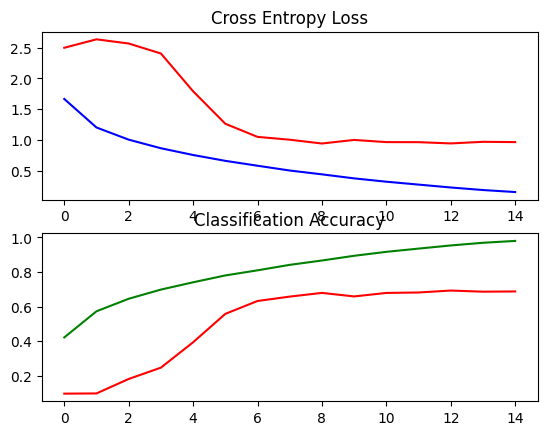

313/313 [==============================] - 1s 2ms/step


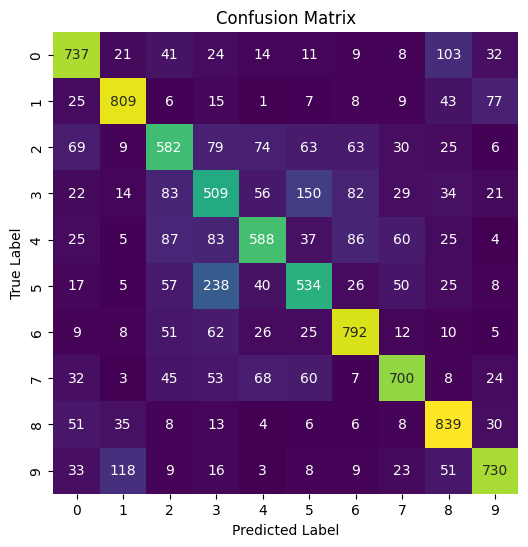

In [17]:
# plot results
helpers.evaluate_model(model, x_test, y_test)
helpers.plot_model_history(history)
helpers.plot_confusion_matrix(model, x_test, y_test)

In [13]:
from keras.backend import clear_session
clear_session()